# Download file from kaggle


In [5]:
# !pip install kaggle

You should consider upgrading via the 'c:\users\iwan1\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [6]:
import os
os.environ['KAGGLE_USERNAME'] = 'muhamadalichwanreal' #'your_kaggle_username'
os.environ['KAGGLE_KEY'] = '27b0861bce1fc5f2f23460d5b18c01b8' #'your_kaggle_api_key'
!kaggle datasets download -d arashnic/learn-time-series-forecasting-from-gold-price

learn-time-series-forecasting-from-gold-price.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import zipfile

zip_file = "D:\Folder Penghubung Github\Machine-Learning\Machine-Learning-exercise\Regression_Machine_learning\learn-time-series-forecasting-from-gold-price.zip"
destination_folder = "D:\Folder Penghubung Github\Machine-Learning\Machine-Learning-exercise\Regression_Machine_learning"

with zipfile.ZipFile(zip_file, "r") as zip_ref:
    zip_ref.extractall(destination_folder)

# Import Libraries


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploration Data


In [9]:
df = pd.read_csv("gold_price_data.csv")
df.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10787 non-null  object 
 1   Value   10787 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


In [11]:
df.describe()

,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


# Use Price and Landsize to make x and y


In [25]:
x = df["Value"]
y = df["Date"].astype("datetime64[ns]").dt.year

x_reshaped = np.reshape(x, (-1, 1))
y_reshaped = np.reshape(y, (-1, 1))

In [26]:
y_reshaped

array([[1970],
       [1970],
       [1970],
       ...,
       [2020],
       [2020],
       [2020]])

In [27]:
x_reshaped

array([[  35.2 ],
       [  35.1 ],
       [  35.4 ],
       ...,
       [1653.75],
       [1570.7 ],
       [1562.8 ]])

# Make training and testing data


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_reshaped, y_reshaped, test_size=0.2, random_state=40
)

In [29]:
x_train

array([[ 644.75],
       [1264.85],
       [ 382.25],
       ...,
       [ 279.  ],
       [ 253.8 ],
       [ 873.5 ]])

# Make Regression Model


In [30]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = reg.predict(x_test)
y_pred

array([[1990.99426781],
       [1993.50713015],
       [1991.94530907],
       ...,
       [1990.8494982 ],
       [2013.12077093],
       [1992.98617088]])

# make a plot


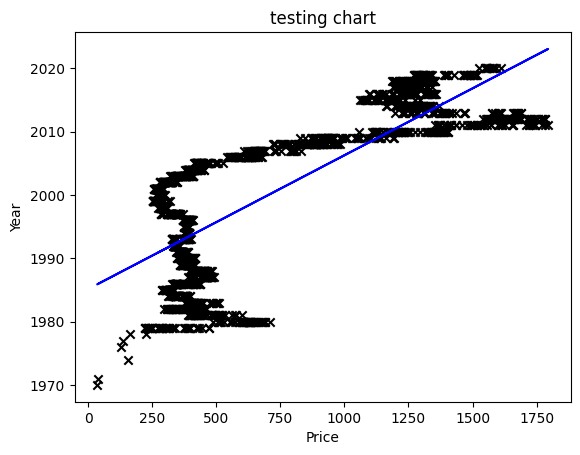

In [34]:
plt.scatter(x_test, y_test, color="black", marker="x")
plt.plot(x_test, y_pred, color="blue")
plt.title("testing chart")
plt.xlabel("Price")
plt.ylabel("Year")
plt.show()

In [35]:
print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [[0.02113425]]
Intercept:  [1985.14747753]


In [36]:
from sklearn import metrics

print("mean squared eror : ", metrics.mean_squared_error(y_pred, y_test))

mean squared eror :  58.31653107258773
